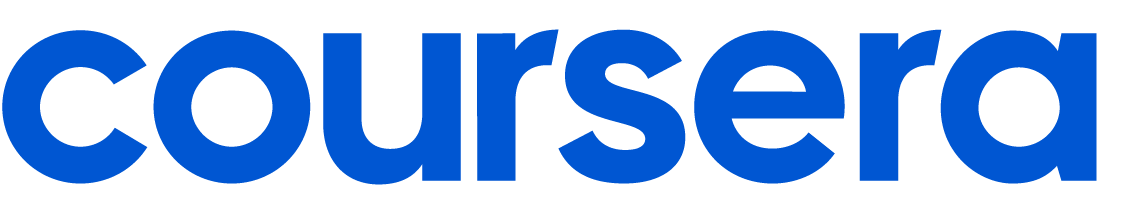

# Welcome to Challenge Labs!

Challenge labs provide CS & DS Coding Competitions with Prizes that Change Learners’ Lives!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly life changing like job interviews at real companies.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the retention prediction problem on a very unique and interesting group of subscribers, Coursera learners! On Coursera, learners can subscribe to sets of courses in order to gain full access to graded assignments, hands-on projects, and course completion certificates. One of the most common ways that learners subscribe to content is via [Specialization Subscriptions](https://www.coursera.support/s/article/216348103-Coursera-subscriptions?language=en_US#specialization), which give learners unlimited access to the courses in a specific specialization on a month-to-month basis.

Imagine that you are a new data scientist at Coursera and you are tasked with building a model that can predict which existing specialization subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the learner completes the specialization or reaches their learning goal and no longer needs the subscription
* the learner finds themselves to be too busy and cancels their subscription until a later time
* the learner determines that the specialization is not the best fit for their learning goals, so they cancel and look for something better suited

Regardless the reason, Coursera has a vested interest in understanding the likelihood of each individual learner to retain in their subscription so that resources can be allocated appropriately to support learners across the various stages of their learning journeys. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past specialization subscriptions that contain information about the learner, the specialization, and the learner's activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (509,837 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (217,921 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique specialization subscription. For each subscription, a single observation (`subscription_id`) is included as of a particular date (`observation_dt`) during which the subscription was active. This date was chosen at random from all the dates during which the subscription was active. In some instances it is soon after the subscription was initiated; in other instances, it is several months after the subscription was initiated and after several previous payments were made. Therefore, your model will have to be able to adapt to different stages of the subscription.

In addition to those identifier columns, the `train.csv` dataset also contains the target label for the task, a binary column `is_retained`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,subscription_id,Identifier,character,Unique identifier of each subscription
1,observation_dt,Identifier,date,The date on which the subscription was observed to calculate the features in the dataset. It was chosen at random amongst all the dates between the start of the subscription and the end of the subscription (before cancellation)
2,is_retained,Target,Integer,"TRAINING SET ONLY! 0 = the learner cancelled their subscription before next payment, 1 = the learner made an additional payment in this subscription"
3,specialization_id,Feature - Specialization Info,character,Unique identifier of a specialization (each subscription gives a learner access to a particular specialization)
4,cnt_courses_in_specialization,Feature - Specialization Info,integer,number of courses in the specialization
5,specialization_domain,Feature - Specialization Info,character,"primary domain of the specialization (Computer Science, Data Science, etc.)"
6,is_professional_certificate,Feature - Specialization Info,boolean,"BOOLEAN for whether the specialization is a ""professional certicate"" (a special type of specialization that awards completers with an industry-sponsored credential)"
7,is_gateway_certificate,Feature - Specialization Info,boolean,"BOOLEAN for whether the specialization is a ""gateway certificate"" (a special type of specialization geared towards learners starting in a new field)"
8,learner_days_since_registration,Feature - Learner Info,integer,Days from coursera registration date to the date on which the observation is made
9,learner_country_group,Feature - Learner Info,character,"the region of the world that the learner is from (United States, East Asia, etc.)"


## How to Submit your Predictions to Coursera

Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 217,921 rows (plus a header row). The first column should be `subscription_id` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription is retained__.

Your submission will show an error if you have extra columns (beyond `subscription_id` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `subscription_id` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import any other packages you may want to use
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score
from sklearn.pipeline import make_pipeline

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [4]:
train_df = pd.read_csv("train_coursera.csv")
train_df.shape

C:\Users\arjba\AppData\Local\Temp\ipykernel_9284\4195389158.py:1: DtypeWarning: Columns (6,7,25,31) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("train_coursera.csv")


(413955, 37)

In [5]:
test_df = pd.read_csv("test_coursera.csv")
test_df.shape

(217921, 36)

## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413955 entries, 0 to 413954
Data columns (total 37 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   subscription_id                                   413955 non-null  object 
 1   observation_dt                                    413955 non-null  object 
 2   is_retained                                       413954 non-null  float64
 3   specialization_id                                 413954 non-null  object 
 4   cnt_courses_in_specialization                     413954 non-null  float64
 5   specialization_domain                             413953 non-null  object 
 6   is_professional_certificate                       413954 non-null  object 
 7   is_gateway_certificate                            413954 non-null  object 
 8   learner_days_since_registration                   413954 non-null  float64
 9   lear

In [7]:
# First let's drop the features that will not be useful for training

train_df.drop(['subscription_id'], axis=1, inplace=True)

In [8]:
# Checking for missing values

train_df.isnull().sum()

observation_dt                                      0
is_retained                                         1
specialization_id                                   1
cnt_courses_in_specialization                       1
specialization_domain                               2
is_professional_certificate                         1
is_gateway_certificate                              1
learner_days_since_registration                     1
learner_country_group                               1
learner_gender                                      1
learner_cnt_other_courses_active                    1
learner_cnt_other_courses_paid_active               1
learner_cnt_other_courses_items_completed           1
learner_cnt_other_courses_paid_items_completed      1
learner_cnt_other_transactions_past                 1
learner_other_revenue                               1
subscription_period_order                           1
days_since_last_payment                             1
days_til_next_payment_due   

In [9]:
# Since very few rows have null values so let's drop these rows

train_df.dropna(inplace=True)

Only 2 rows were dropped

In [10]:
# Re-Checking for missing values

train_df.isnull().sum()

observation_dt                                      0
is_retained                                         0
specialization_id                                   0
cnt_courses_in_specialization                       0
specialization_domain                               0
is_professional_certificate                         0
is_gateway_certificate                              0
learner_days_since_registration                     0
learner_country_group                               0
learner_gender                                      0
learner_cnt_other_courses_active                    0
learner_cnt_other_courses_paid_active               0
learner_cnt_other_courses_items_completed           0
learner_cnt_other_courses_paid_items_completed      0
learner_cnt_other_transactions_past                 0
learner_other_revenue                               0
subscription_period_order                           0
days_since_last_payment                             0
days_til_next_payment_due   

In [11]:
# Let's explore columns of type 'object'

object_cols = train_df.select_dtypes(include='object')
object_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413953 entries, 0 to 413953
Data columns (total 9 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   observation_dt                           413953 non-null  object
 1   specialization_id                        413953 non-null  object
 2   specialization_domain                    413953 non-null  object
 3   is_professional_certificate              413953 non-null  object
 4   is_gateway_certificate                   413953 non-null  object
 5   learner_country_group                    413953 non-null  object
 6   learner_gender                           413953 non-null  object
 7   is_subscription_started_with_free_trial  413953 non-null  object
 8   is_active_capstone_during_pay_period     413953 non-null  object
dtypes: object(9)
memory usage: 31.6+ MB


In [12]:
# Let's check what are the values in these 'object' datatype columns

for col in object_cols.columns:
    print(train_df[col].value_counts())
    print("\n")

2021-06-06    1293
2021-04-24    1287
2021-05-30    1283
2021-05-14    1277
2021-05-13    1269
              ... 
2022-07-28       8
2022-07-29       7
2021-01-01       5
2022-07-30       4
2022-07-31       1
Name: observation_dt, Length: 577, dtype: int64


kr43OcbTEeqeNBKhfgCLyw    60669
fq9UWMbTEeqpthJ2RmWGow    43936
Z-5wCcbTEeqeNBKhfgCLyw    39282
7lHCSlFIEeeffRIHljDI_g    37436
dwzq23ZLEei12goo904QNg    13424
                          ...  
dGxGwiFhEeyCQg58igTtXQ        1
QNGZuhobEeyLjw43am_1Lw        1
LdUf6lXcEeu1mwqGqLlyWQ        1
K4jWk4KYEeusLw6jAKT62Q        1
TJvG4FKtEeyKpBLIBkHB1w        1
Name: specialization_id, Length: 742, dtype: int64


Data Science                        141404
Business                             98244
Computer Science                     74786
Information Technology               65047
Arts and Humanities                  10436
Health                                7297
Language Learning                     7055
Physical Science and Engineering   

Some of the feature datatypes are not appropriate, let's change them to the best possible types using convert_dtypes()

In [13]:
train_df = train_df.convert_dtypes()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413953 entries, 0 to 413953
Data columns (total 36 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   observation_dt                                    413953 non-null  string 
 1   is_retained                                       413953 non-null  Int64  
 2   specialization_id                                 413953 non-null  string 
 3   cnt_courses_in_specialization                     413953 non-null  Int64  
 4   specialization_domain                             413953 non-null  string 
 5   is_professional_certificate                       413953 non-null  boolean
 6   is_gateway_certificate                            413953 non-null  boolean
 7   learner_days_since_registration                   413953 non-null  Int64  
 8   learner_country_group                             413953 non-null  string 
 9   lear

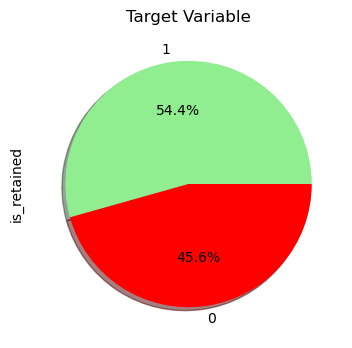

In [14]:
# Let's check the distribution of the the Target variable

pd.value_counts(train_df['is_retained']).plot(kind='pie',
                        y='is_retained',
                        title='Target Variable',
                        colors = ['lightgreen', 'red'],
                        shadow=True,
                        figsize=(4,4),
                        autopct='%1.1f%%');

This is a fairly balanced dataset in-terms of the target variable

In [15]:
# Let's take a look at the descriptive statistics of the numeric variables

train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_retained,413953.0,0.543663,0.498090,0.0,0.00,1.000000,1.000000,1.000000
cnt_courses_in_specialization,413953.0,5.926644,1.759556,3.0,5.00,6.000000,7.000000,13.000000
learner_days_since_registration,413953.0,745.107128,950.801071,0.0,71.00,279.000000,1109.000000,3857.000000
learner_cnt_other_courses_active,413953.0,5.421739,13.819050,0.0,0.00,1.000000,4.000000,604.000000
learner_cnt_other_courses_paid_active,413953.0,1.281520,3.743266,0.0,0.00,0.000000,1.000000,215.000000
learner_cnt_other_courses_items_completed,413953.0,114.289243,303.469990,0.0,0.00,4.000000,90.000000,19439.000000
learner_cnt_other_courses_paid_items_completed,413953.0,62.943660,194.270090,0.0,0.00,0.000000,13.000000,6912.000000
learner_cnt_other_transactions_past,413953.0,1.966615,6.517248,0.0,0.00,0.000000,1.000000,474.000000
learner_other_revenue,413953.0,101.281377,353.680276,0.0,0.00,0.000000,49.000000,24069.920000
subscription_period_order,413953.0,2.477221,2.352874,1.0,1.00,2.000000,3.000000,19.000000


In [16]:
# Let's take a look at the statistics of the categorical variables

train_df.describe(include=['string']).T

,count,unique,top,freq
observation_dt,413953,577,2021-06-06,1293
specialization_id,413953,742,kr43OcbTEeqeNBKhfgCLyw,60669
specialization_domain,413953,11,Data Science,141404
learner_country_group,413953,15,United States,195559
learner_gender,413953,4,male,181651


'learner_gender' feature seems to have multiple unique values so let's explore it

In [17]:
train_df['learner_gender'].value_counts()

male       181651
unknown    119609
female     111585
other        1108
Name: learner_gender, dtype: Int64

Let's combine 'unknown' and 'other' into one category under 'other'

In [18]:
train_df['learner_gender'].replace({'unknown':'other'}, inplace=True)

In [19]:
# Re-checking

train_df['learner_gender'].value_counts()

male      181651
other     120717
female    111585
Name: learner_gender, dtype: Int64

In [20]:
# Let's explore columns of type 'float64'

float_cols = train_df.select_dtypes(include='float64')

C:\Users\arjba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


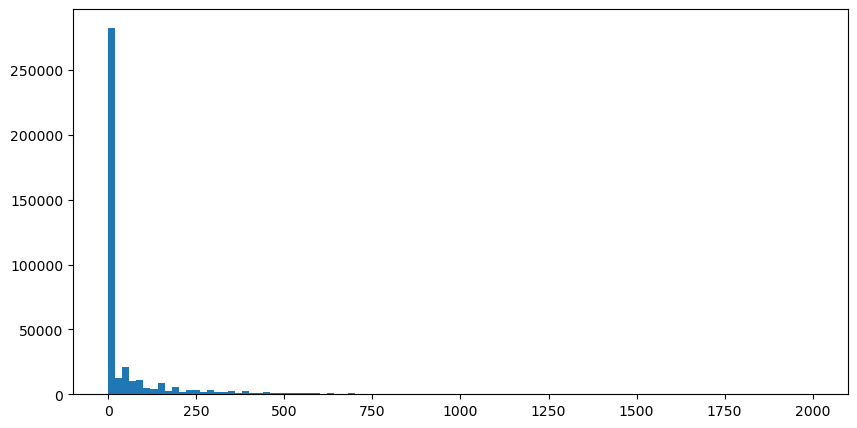

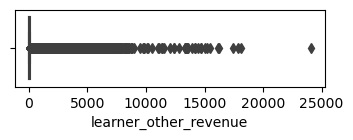

In [21]:
# Let's explore these with histograms

plt.figure(figsize=(10,5))
plt.hist(x=train_df['learner_other_revenue'], bins=100, range=(0,2000));

# Let's check for outliers with a box plot

plt.figure(figsize=(4,1))
sns.boxplot(train_df['learner_other_revenue']);

It has many outliers

In [22]:
# Let's check the Q1, Q2, Q3 and 99th percentile value

train_df['learner_other_revenue'].quantile([0.25, 0.5, 0.75, 0.99])

0.25       0.0
0.50       0.0
0.75      49.0
0.99    1496.5
Name: learner_other_revenue, dtype: Float64

This feature has many outliers. We need to handle the outliers. We will use **capping technique** by replacing values above the 99th percentile with the 99th percentile value.

In [23]:
# How many outliers are there?

len(train_df[train_df['learner_other_revenue']>1496.5])

4139

In [24]:
# Replacing values above the 99th percentile with the 99th percentile value

train_df['learner_other_revenue'] = np.where(train_df['learner_other_revenue'] > 1496.5, 1496.5, 
                                             train_df['learner_other_revenue'])

In [25]:
# Re-checking

len(train_df[train_df['learner_other_revenue']>1496.5])

0

C:\Users\arjba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


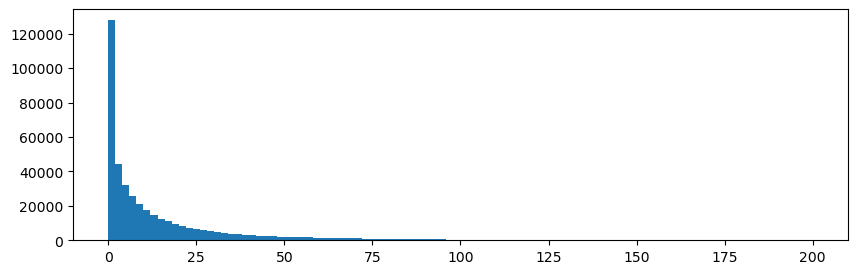

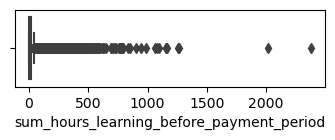

In [26]:
# Let's explore the next float variable

plt.figure(figsize=(10,3))
plt.hist(x=train_df['sum_hours_learning_before_payment_period'], bins=100, range=(0,200));

# Let's check for outliers with a box plot

plt.figure(figsize=(4,1))
sns.boxplot(train_df['sum_hours_learning_before_payment_period']);

In [27]:
train_df['sum_hours_learning_before_payment_period'].quantile([0.25, 0.5, 0.75, 0.99])

0.25          1.15
0.50      6.183333
0.75     18.633333
0.99    117.991333
Name: sum_hours_learning_before_payment_period, dtype: Float64

Applying capping technique for this variable 

In [28]:
train_df['sum_hours_learning_before_payment_period'] = np.where(train_df['sum_hours_learning_before_payment_period'] > 117.991333, 
                                                                117.991333, train_df['sum_hours_learning_before_payment_period'])

C:\Users\arjba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


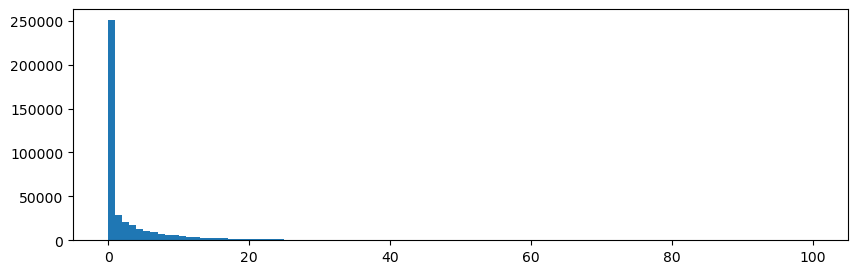

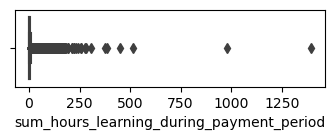

In [29]:
# Let's explore the next float variable

plt.figure(figsize=(10,3))
plt.hist(x=train_df['sum_hours_learning_during_payment_period'], bins=100, range=(0,100));

# Let's check for outliers with a box plot

plt.figure(figsize=(4,1))
sns.boxplot(train_df['sum_hours_learning_during_payment_period']);

In [30]:
train_df['sum_hours_learning_during_payment_period'].quantile([0.25, 0.5, 0.75, 0.99])

0.25          0.0
0.50          0.0
0.75     3.533333
0.99    37.341333
Name: sum_hours_learning_during_payment_period, dtype: Float64

Applying capping technique for this variable

In [31]:
train_df['sum_hours_learning_during_payment_period'] = np.where(train_df['sum_hours_learning_during_payment_period'] > 37.341333, 
                                                                37.341333, train_df['sum_hours_learning_during_payment_period'])

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413953 entries, 0 to 413953
Data columns (total 36 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   observation_dt                                    413953 non-null  string 
 1   is_retained                                       413953 non-null  Int64  
 2   specialization_id                                 413953 non-null  string 
 3   cnt_courses_in_specialization                     413953 non-null  Int64  
 4   specialization_domain                             413953 non-null  string 
 5   is_professional_certificate                       413953 non-null  boolean
 6   is_gateway_certificate                            413953 non-null  boolean
 7   learner_days_since_registration                   413953 non-null  Int64  
 8   learner_country_group                             413953 non-null  string 
 9   lear

**Feature Scaling**

In [33]:
train_df.select_dtypes(['Int64','float64']).columns

Index(['is_retained', 'cnt_courses_in_specialization',
       'learner_days_since_registration', 'learner_cnt_other_courses_active',
       'learner_cnt_other_courses_paid_active',
       'learner_cnt_other_courses_items_completed',
       'learner_cnt_other_courses_paid_items_completed',
       'learner_cnt_other_transactions_past', 'subscription_period_order',
       'days_since_last_payment', 'days_til_next_payment_due',
       'cnt_enrollments_started_before_payment_period',
       'cnt_enrollments_completed_before_payment_period',
       'cnt_enrollments_active_before_payment_period',
       'cnt_items_completed_before_payment_period',
       'cnt_graded_items_completed_before_payment_period',
       'cnt_enrollments_started_during_payment_period',
       'cnt_enrollments_completed_during_payment_period',
       'cnt_enrollments_active_during_payment_period',
       'cnt_items_completed_during_payment_period',
       'cnt_graded_items_completed_during_payment_period',
       'cnt_

We will be using Robust Scaling since it works well with variables having ouliers

In [34]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

to_scale_cols=['cnt_courses_in_specialization',
               'learner_days_since_registration', 
               'learner_cnt_other_courses_active',
               'learner_cnt_other_courses_paid_active',
               'learner_cnt_other_courses_items_completed',
               'learner_cnt_other_courses_paid_items_completed',
               'learner_cnt_other_transactions_past', 
               'learner_other_revenue',
               'subscription_period_order', 
               'days_since_last_payment',
               'days_til_next_payment_due',
               'cnt_enrollments_started_before_payment_period',
               'cnt_enrollments_completed_before_payment_period',
               'cnt_enrollments_active_before_payment_period',
               'cnt_items_completed_before_payment_period',
               'cnt_graded_items_completed_before_payment_period',
               'cnt_enrollments_started_during_payment_period',
               'cnt_enrollments_completed_during_payment_period',
               'cnt_enrollments_active_during_payment_period',
               'cnt_items_completed_during_payment_period',
               'cnt_graded_items_completed_during_payment_period',
               'sum_hours_learning_before_payment_period',
               'sum_hours_learning_during_payment_period',
               'cnt_days_active_before_payment_period',
               'cnt_days_active_during_payment_period',
               'cnt_days_since_last_activity']

In [35]:
# Applying the scaler

for col in to_scale_cols:
    train_df[col] = scaler.fit_transform(pd.DataFrame(train_df[col]))

Now let's change the Boolean columns to binary 0 & 1 as would be required by the Neural Network model that we shall develop

In [36]:
boolean_cols = train_df.select_dtypes(include=['boolean']).columns

for col in boolean_cols:
    train_df[col] = train_df[col].map({True:1, False:0})    

Let's drop specialization_id and observation_dt columns as these variables would not be useful for training

In [37]:
train_df.drop(['specialization_id','observation_dt'], axis=1, inplace=True)

In [38]:
# Let's check datatypes of all the columns now

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413953 entries, 0 to 413953
Data columns (total 34 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   is_retained                                       413953 non-null  Int64  
 1   cnt_courses_in_specialization                     413953 non-null  float64
 2   specialization_domain                             413953 non-null  string 
 3   is_professional_certificate                       413953 non-null  int64  
 4   is_gateway_certificate                            413953 non-null  int64  
 5   learner_days_since_registration                   413953 non-null  float64
 6   learner_country_group                             413953 non-null  string 
 7   learner_gender                                    413953 non-null  string 
 8   learner_cnt_other_courses_active                  413953 non-null  float64
 9   lear

**Correlations between features**

In [39]:
numeric = train_df.select_dtypes(['Int64','float64']).columns

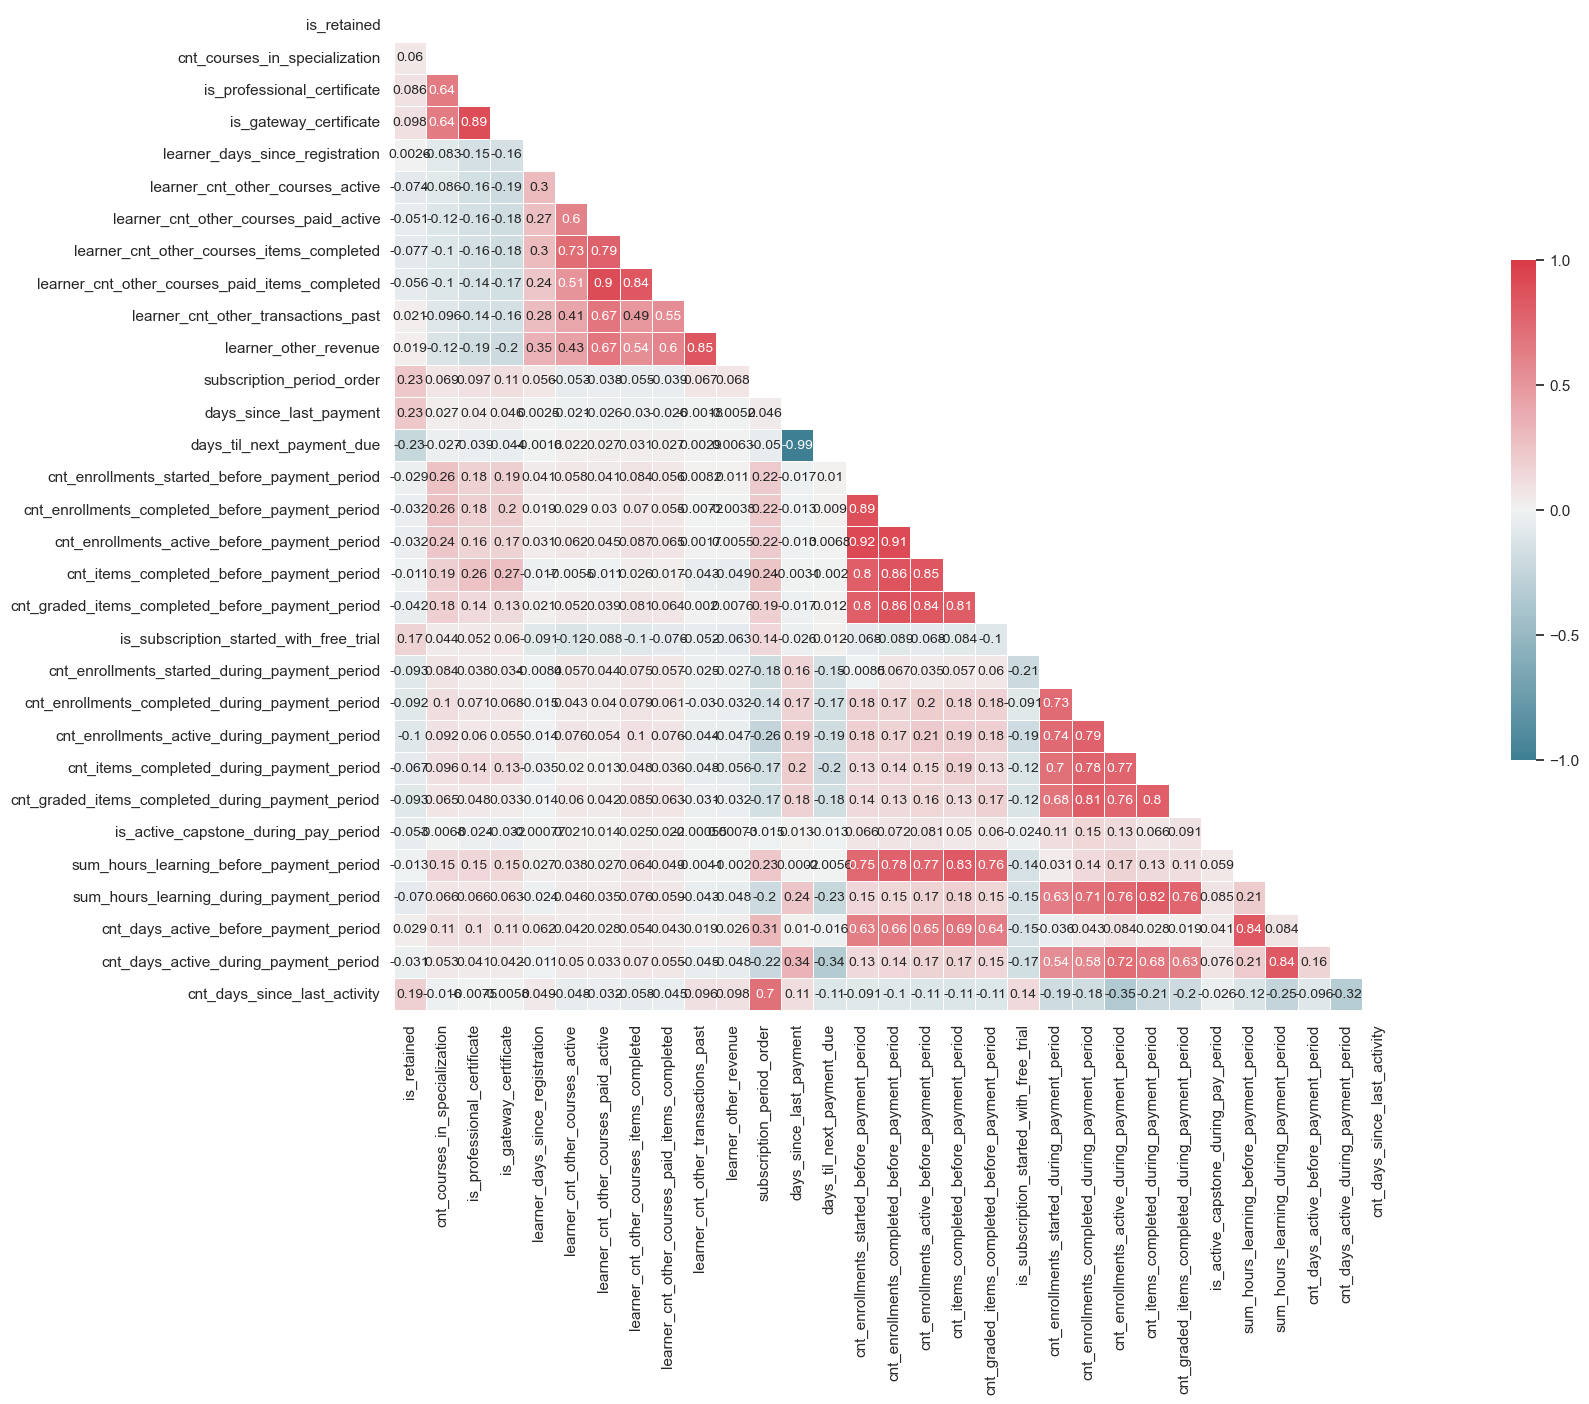

In [40]:
sns.set(style="white", font_scale=1)

corr = train_df[numeric].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30, 13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 10})
cbar=ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])

There is multicollinearity in this data as quite a few variables seem to have high correlations. Since we will be using a Neural Network we don't have to worry much about dropping highly correlated variables or feature selection since Neural Networks are known to extract useful features themselves and can very well handle multicollinearity.

**One-hot encoding Categorical Variables**

In [41]:
categorical_cols =['specialization_domain','learner_country_group','learner_gender']

train_encoded = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)

In [42]:
train_encoded.head()

,is_retained,cnt_courses_in_specialization,is_professional_certificate,is_gateway_certificate,learner_days_since_registration,learner_cnt_other_courses_active,learner_cnt_other_courses_paid_active,learner_cnt_other_courses_items_completed,learner_cnt_other_courses_paid_items_completed,learner_cnt_other_transactions_past,...,learner_country_group_India,learner_country_group_Middle East,learner_country_group_Non-Brazil Latin America,learner_country_group_Northern Europe,learner_country_group_Russia and neighbors,learner_country_group_Southeast Asia,learner_country_group_Southern Europe,learner_country_group_United States,learner_gender_male,learner_gender_other
0,1,1.0,1,1,1.967245,1.75,0.0,0.933333,0.000000,0.0,...,0,0,0,1,0,0,0,0,0,0
1,0,0.0,1,0,0.320809,12.75,2.0,2.277778,5.769231,1.0,...,0,0,0,1,0,0,0,0,0,0
2,0,0.0,1,1,-0.242775,1.00,0.0,0.011111,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
3,1,-0.5,1,1,-0.153179,-0.25,0.0,-0.044444,0.000000,0.0,...,0,0,0,0,0,0,0,1,1,0
4,0,1.0,1,1,0.914258,-0.25,0.0,-0.044444,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1


In [43]:
# Let's convert all the variables into float type since we are going to feed the data into a Neural Network

train_encoded = train_encoded.astype('float64')
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413953 entries, 0 to 413953
Data columns (total 57 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   is_retained                                             413953 non-null  float64
 1   cnt_courses_in_specialization                           413953 non-null  float64
 2   is_professional_certificate                             413953 non-null  float64
 3   is_gateway_certificate                                  413953 non-null  float64
 4   learner_days_since_registration                         413953 non-null  float64
 5   learner_cnt_other_courses_active                        413953 non-null  float64
 6   learner_cnt_other_courses_paid_active                   413953 non-null  float64
 7   learner_cnt_other_courses_items_completed               413953 non-null  float64
 8   learner_cnt_other_course

### Splitting the data into Training & Test sets

In [44]:
y = train_encoded['is_retained']
X = train_encoded.drop('is_retained', axis=1, inplace=False)

In [45]:
# Splitting the data into 80:20 for Training & testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)

In [46]:
# Checking data set dimensions

print(X_train.shape)
print(X_test.shape)

(331162, 56)
(82791, 56)


In [47]:
y_train.value_counts()

1.0    180041
0.0    151121
Name: is_retained, dtype: int64

### Model Building

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from numpy.random import seed
seed(40)

n_input = X_train.shape[1]

# Experimented with many NN architectures, a simple one is outperforming
# Lesser number of neurons in the 1st layer is putting pressure on the NN to extract best features out of the data

model = Sequential([
    Dense(20, input_dim=n_input, activation="relu"),
    Dense(1, activation='sigmoid')    
])

adam = tf.keras.optimizers.Adam(learning_rate=0.001) # Experimented with different learning rates before selecting 0.001
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['AUC'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                1140      
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,161
Trainable params: 1,161
Non-trainable params: 0
_________________________________________________________________


In [49]:
''' We are using a weighted Neural Network here to take care of the slight imbalance in the dependent variable, 
although not stictly required since there isn't too much imbalance. We still used one because it slightly 
improved model performance'''

weights = {0:1.2, 1:1}

es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    mode="auto",
    restore_best_weights=True
)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32,
                    class_weight=weights, callbacks=[es],
                    epochs=50,  verbose=1)

# Predict using the trained model
yhat = model.predict(X_test)

Epoch 1/50
10349/10349 [==============================] - 32s 3ms/step - loss: 0.6618 - auc: 0.7326 - val_loss: 0.6009 - val_auc: 0.7388
Epoch 2/50
10349/10349 [==============================] - 31s 3ms/step - loss: 0.6486 - auc: 0.7458 - val_loss: 0.5908 - val_auc: 0.7469
Epoch 3/50
10349/10349 [==============================] - 31s 3ms/step - loss: 0.6450 - auc: 0.7492 - val_loss: 0.5896 - val_auc: 0.7475
Epoch 4/50
10349/10349 [==============================] - 30s 3ms/step - loss: 0.6429 - auc: 0.7513 - val_loss: 0.5875 - val_auc: 0.7488
Epoch 5/50
10349/10349 [==============================] - 28s 3ms/step - loss: 0.6412 - auc: 0.7530 - val_loss: 0.5968 - val_auc: 0.7477
Epoch 6/50
10349/10349 [==============================] - 31s 3ms/step - loss: 0.6400 - auc: 0.7541 - val_loss: 0.5851 - val_auc: 0.7527
Epoch 7/50
10349/10349 [==============================] - 31s 3ms/step - loss: 0.6392 - auc: 0.7548 - val_loss: 0.5898 - val_auc: 0.7513
Epoch 8/50
10349/10349 [=================

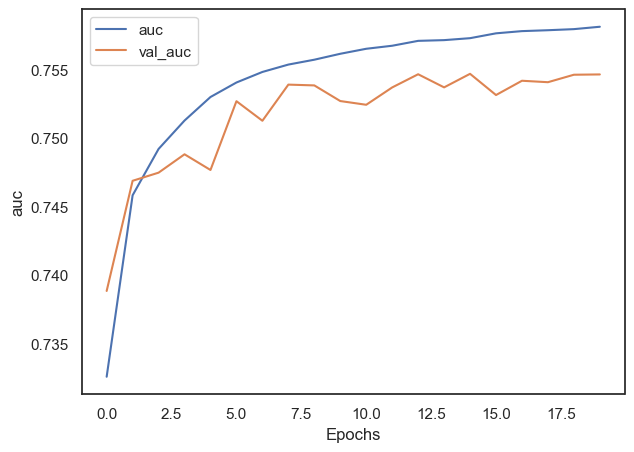

In [50]:
def plot_graphs(history, metric):
    
    plt.figure(figsize=(7,5))
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "auc")

In [51]:
# Re-training the model with almost all the training data

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['AUC'])

# Re-train the model
history = model.fit(X, y, validation_split=0.05,
                    class_weight=weights, 
                    epochs=50, callbacks=[es], verbose=1)

Epoch 1/500
12290/12290 [==============================] - 17s 1ms/step - loss: 0.6373 - auc: 0.7565 - val_loss: 0.5798 - val_auc: 0.7597
Epoch 2/500
12290/12290 [==============================] - 14s 1ms/step - loss: 0.6369 - auc: 0.7569 - val_loss: 0.5817 - val_auc: 0.7601
Epoch 3/500
12290/12290 [==============================] - 15s 1ms/step - loss: 0.6368 - auc: 0.7570 - val_loss: 0.5808 - val_auc: 0.7611
Epoch 4/500
12290/12290 [==============================] - 14s 1ms/step - loss: 0.6366 - auc: 0.7571 - val_loss: 0.5839 - val_auc: 0.7603
Epoch 5/500
12290/12290 [==============================] - 14s 1ms/step - loss: 0.6365 - auc: 0.7573 - val_loss: 0.5794 - val_auc: 0.7597
Epoch 6/500
12290/12290 [==============================] - 14s 1ms/step - loss: 0.6364 - auc: 0.7574 - val_loss: 0.5778 - val_auc: 0.7598
Epoch 7/500
12290/12290 [==============================] - 15s 1ms/step - loss: 0.6364 - auc: 0.7574 - val_loss: 0.5798 - val_auc: 0.7601
Epoch 8/500
12290/12290 [=========

### Preparing test data for prediction

In [52]:
test_df_copy = test_df.copy()

In [53]:
# Checking for missing values

test_df.isnull().sum()

subscription_id                                     0
observation_dt                                      0
specialization_id                                   0
cnt_courses_in_specialization                       0
specialization_domain                               0
is_professional_certificate                         0
is_gateway_certificate                              0
learner_days_since_registration                     0
learner_country_group                               0
learner_gender                                      0
learner_cnt_other_courses_active                    0
learner_cnt_other_courses_paid_active               0
learner_cnt_other_courses_items_completed           0
learner_cnt_other_courses_paid_items_completed      0
learner_cnt_other_transactions_past                 0
learner_other_revenue                               0
subscription_period_order                           0
days_since_last_payment                             0
days_til_next_payment_due   

In [54]:
# Let's carry out all the required data preprocessing/transformations/manipulations before feeding them to the model for prediction

test_df.drop(['subscription_id'], axis=1, inplace=True)

test_df = test_df.convert_dtypes()

test_df['learner_gender'].replace({'unknown':'other'}, inplace=True)

test_df['learner_other_revenue']=np.where(test_df['learner_other_revenue'] > 1496.5, 1496.5, test_df['learner_other_revenue'])

test_df['sum_hours_learning_before_payment_period']=np.where(test_df['sum_hours_learning_before_payment_period'] > 117.991333,
                                                                117.991333, test_df['sum_hours_learning_before_payment_period'])

test_df['sum_hours_learning_during_payment_period']=np.where(test_df['sum_hours_learning_during_payment_period'] > 37.341333, 
                                                                37.341333, test_df['sum_hours_learning_during_payment_period'])

to_scale_cols=['cnt_courses_in_specialization',
               'learner_days_since_registration', 
               'learner_cnt_other_courses_active',
               'learner_cnt_other_courses_paid_active',
               'learner_cnt_other_courses_items_completed',
               'learner_cnt_other_courses_paid_items_completed',
               'learner_cnt_other_transactions_past', 
               'learner_other_revenue',
               'subscription_period_order', 
               'days_since_last_payment',
               'days_til_next_payment_due',
               'cnt_enrollments_started_before_payment_period',
               'cnt_enrollments_completed_before_payment_period',
               'cnt_enrollments_active_before_payment_period',
               'cnt_items_completed_before_payment_period',
               'cnt_graded_items_completed_before_payment_period',
               'cnt_enrollments_started_during_payment_period',
               'cnt_enrollments_completed_during_payment_period',
               'cnt_enrollments_active_during_payment_period',
               'cnt_items_completed_during_payment_period',
               'cnt_graded_items_completed_during_payment_period',
               'sum_hours_learning_before_payment_period',
               'sum_hours_learning_during_payment_period',
               'cnt_days_active_before_payment_period',
               'cnt_days_active_during_payment_period',
               'cnt_days_since_last_activity']

for col in to_scale_cols:
    test_df[col] = scaler.fit_transform(pd.DataFrame(test_df[col]))

boolean_cols = test_df.select_dtypes(include=['boolean']).columns

for col in boolean_cols:
    test_df[col] = test_df[col].map({True:1, False:0})   

test_df.drop(['specialization_id','observation_dt'], axis=1, inplace=True)

categorical_cols =['specialization_domain','learner_country_group','learner_gender']

test_encoded = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

test_encoded = test_encoded.astype('float64')
test_encoded.head()

,cnt_courses_in_specialization,is_professional_certificate,is_gateway_certificate,learner_days_since_registration,learner_cnt_other_courses_active,learner_cnt_other_courses_paid_active,learner_cnt_other_courses_items_completed,learner_cnt_other_courses_paid_items_completed,learner_cnt_other_transactions_past,learner_other_revenue,...,learner_country_group_India,learner_country_group_Middle East,learner_country_group_Non-Brazil Latin America,learner_country_group_Northern Europe,learner_country_group_Russia and neighbors,learner_country_group_Southeast Asia,learner_country_group_Southern Europe,learner_country_group_United States,learner_gender_male,learner_gender_other
0,1.0,1.0,1.0,-0.245648,-0.25,0.0,-0.043956,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.451644,2.50,9.0,4.901099,31.071429,9.0,6.571224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,1.0,-0.000967,0.25,1.0,0.021978,0.285714,1.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.0,0.0,0.0,0.352998,2.25,0.0,1.186813,0.000000,0.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.5,1.0,1.0,-0.192456,-0.25,0.0,-0.043956,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 217,921 entries plus a header row attempting to predict the likelihood of retention for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `subscription_id` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`subscription_id` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `subscription_id` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts retention using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [55]:
# Making predictions now

predicted_probability = model.predict(test_encoded)

6811/6811 [==============================] - 8s 1ms/step


In [56]:
# Combine predictions with label column into a dataframe

prediction_df = pd.DataFrame({'subscription_id': test_df_copy[['subscription_id']].values[:, 0],
                             'predicted_probability': predicted_probability[:,0]})

In [57]:
# View our 'prediction_df' dataframe as required for submission.
# Ensuring it should contain 217,921 rows and 2 columns 'subscription_id' and 'predicted_probaility'

print(prediction_df.shape)
prediction_df.head(10)

(217921, 2)


,subscription_id,predicted_probability
0,-1flsPG4EeuOTBLG4RY78Q,0.524683
1,-3jgpo3XEeuquA5bylYGqQ,0.776744
2,-4iSgbBhEeutEwol7kuJnw,0.793628
3,-D1ayv64Eeuw4w5IkZJKbw,0.330213
4,-DJEc-L5Eeub2BLESLBCkw,0.641963
5,-EbzSDdgEeyiog5l139adw,0.532954
6,-GVVgmMxEeuQZgoplpe76w,0.449225
7,-H4Bil5DEeyGdgqSaUkc7Q,0.020982
8,-O-hHcevEeuPIA4yld1PaQ,0.322114
9,-VFHd3C_EeuyDgqvLkrnfQ,0.830100


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for grading. Please run the tests below an ensure no assertion errors are thrown.

In [58]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [59]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 217921, 'The dataframe prediction_df should have 217921 rows.'

In [60]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [61]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.


## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!

### FINAL RESULTS

**Made it to Top 10 solutions! I secured 9th position globally in the final leaderboard. The result screenshots are presented below.**

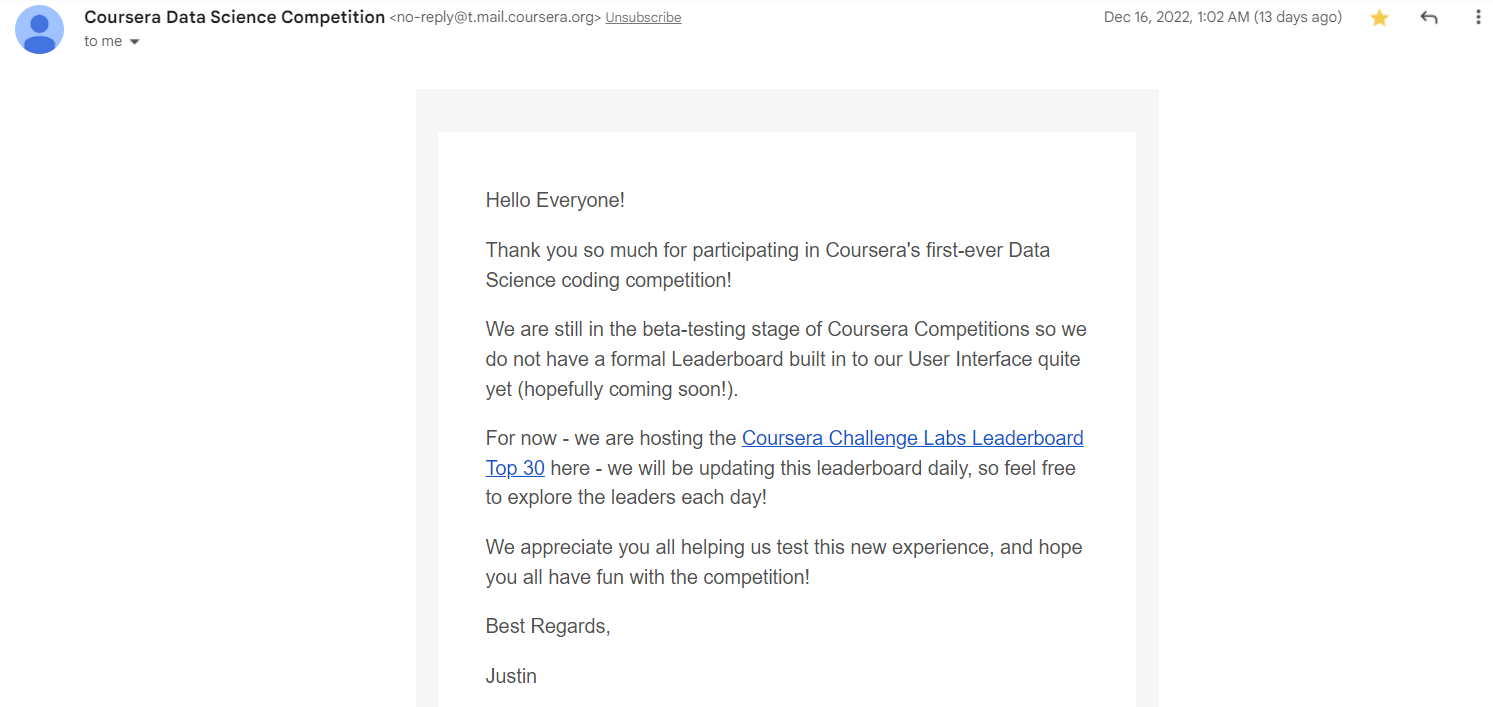

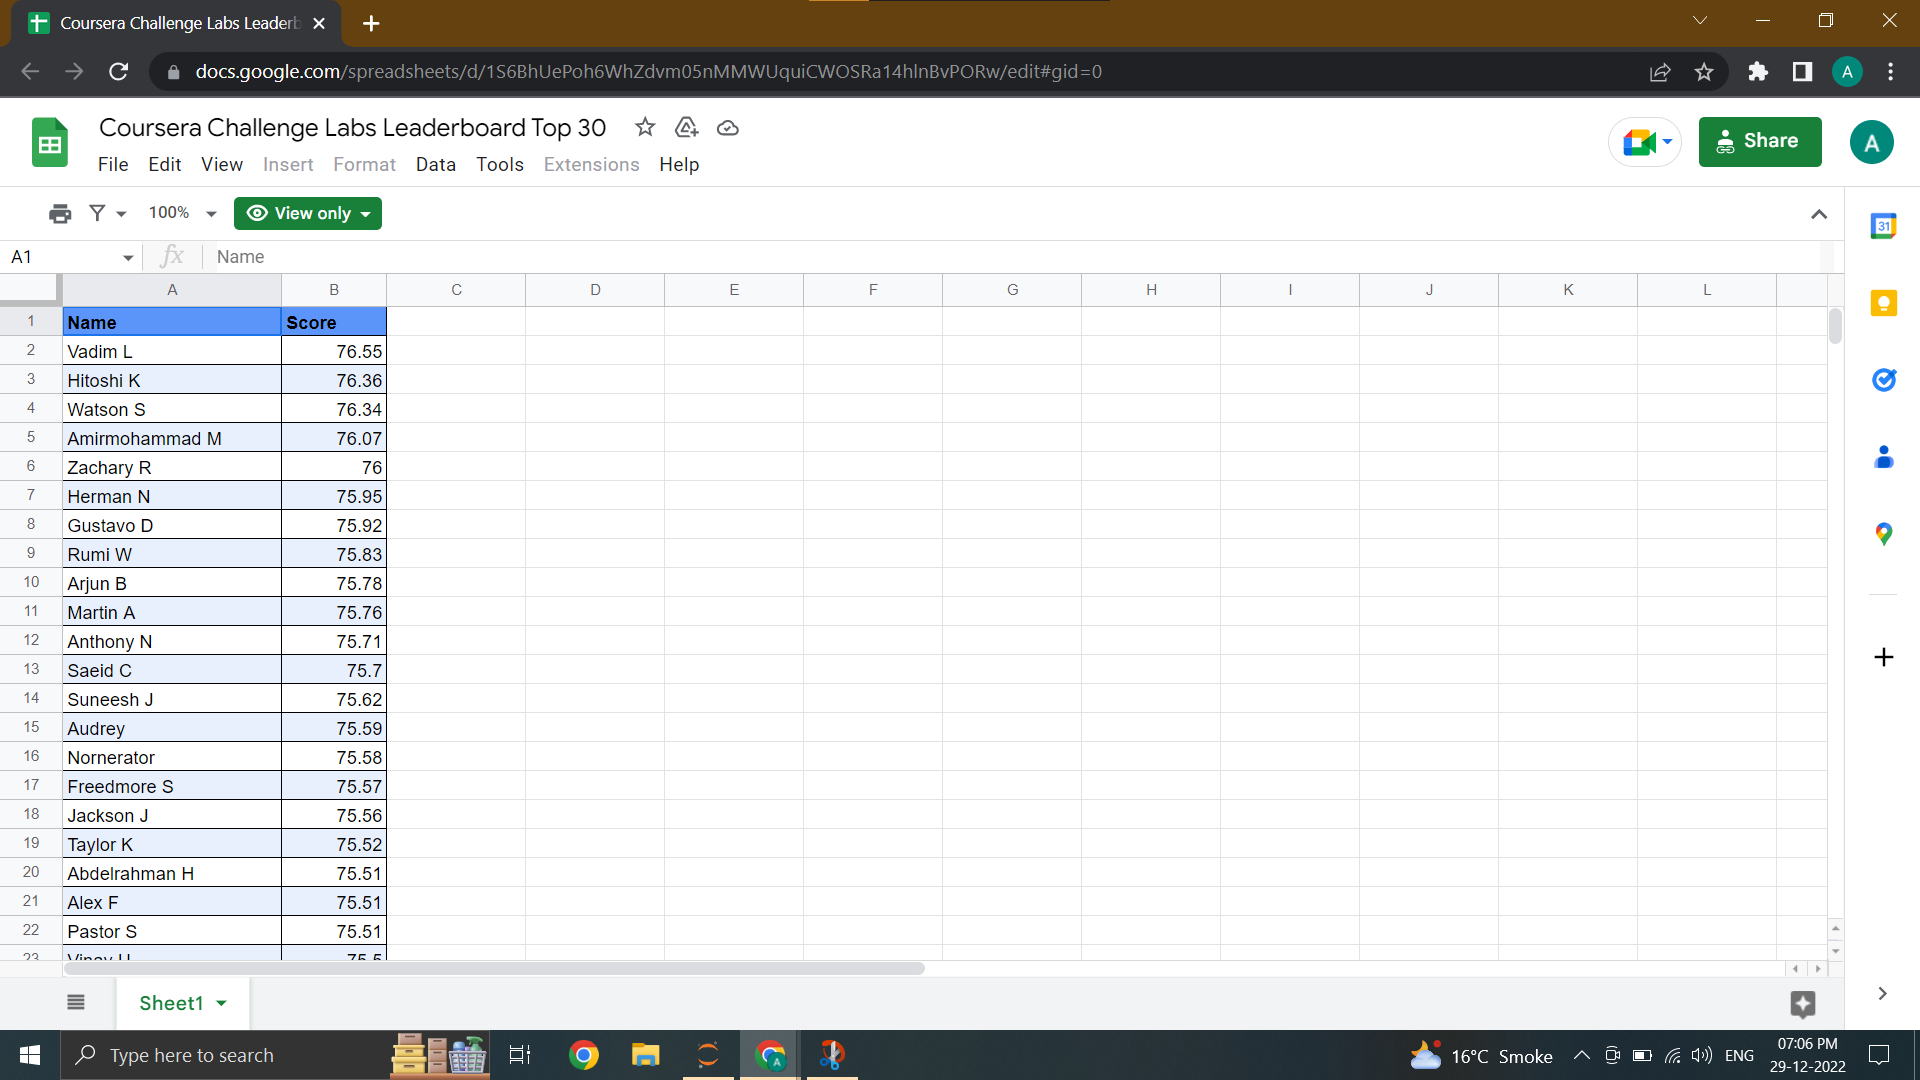